In [62]:
import pandas as pd
import numpy as np
import random

df=pd.read_csv ("data/athlets.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [63]:
# Filling Missing Data
#The missing data in 'Age', 'Height', and 'Weight' columns will be replaced by their mean.
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)
#The missing data in 'Medal' column will be replaced number 0.
df["Medal"]=df["Medal"].fillna("No medal")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal


In [64]:
#Creating Dummy Variables
dummy=pd.get_dummies(df[["Medal","Sex","Season"]])
dummy.head()

,Medal_Bronze,Medal_Gold,Medal_No medal,Medal_Silver,Sex_F,Sex_M,Season_Summer,Season_Winter
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,1,0
2,0,0,1,0,0,1,1,0
3,0,1,0,0,0,1,1,0
4,0,0,1,0,1,0,0,1


In [65]:
df=pd.concat([df,dummy],axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Event,Medal,Medal_Bronze,Medal_Gold,Medal_No medal,Medal_Silver,Sex_F,Sex_M,Season_Summer,Season_Winter
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Basketball Men's Basketball,No medal,0,0,1,0,0,1,1,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,Judo Men's Extra-Lightweight,No medal,0,0,1,0,0,1,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,...,Football Men's Football,No medal,0,0,1,0,0,1,1,0
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,...,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0,0,1,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Speed Skating Women's 500 metres,No medal,0,0,1,0,1,0,0,1


In [66]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Medal_Bronze',
       'Medal_Gold', 'Medal_No medal', 'Medal_Silver', 'Sex_F', 'Sex_M',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

**Standardize numeric attributes with StandardScaler.**

In [71]:
df_st=df[['Age', 'Height', 'Weight','Medal_No medal','Medal_Bronze','Medal_Gold', 'Medal_Silver','Sex_F', 'Sex_M', 'Season_Summer',
       'Season_Winter']]
df_st.head()

,Age,Height,Weight,Medal_No medal,Medal_Bronze,Medal_Gold,Medal_Silver,Sex_F,Sex_M,Season_Summer,Season_Winter
0,24.0,180.0,80.0,1,0,0,0,0,1,1,0
1,23.0,170.0,60.0,1,0,0,0,0,1,1,0
2,24.0,175.0,70.0,1,0,0,0,0,1,1,0
3,34.0,175.0,70.0,0,0,1,0,0,1,1,0
4,21.0,185.0,82.0,1,0,0,0,1,0,0,1


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_st))

StandardScaler()


In [73]:
print(scaler.mean_)

[2.55024934e+01 1.75263740e+02 7.05394997e+01 8.53262072e-01
 4.90380501e-02 4.93220614e-02 4.83778161e-02 2.74871273e-01
 7.25128727e-01 8.20873722e-01 1.79126278e-01]


# Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [115]:
from sklearn.decomposition import PCA
df_pca=df[['Age', 'Height', 'Weight']]
df_pca.head()

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,175.0,70.0
3,34.0,175.0,70.0
4,21.0,185.0,82.0


In [116]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data = principal_components, columns = ['pc_1', 'pc_2'])
                                                                    
#pc_3', 'pc_4', 'pc_5', 'pc_6','pc_7', 'pc_8', 'pc_9', 'pc_10', 'pc_11'])
principal_df

,pc_1,pc_2
0,10.342153,-2.089058
1,-11.830524,-1.803615
2,-0.706360,-1.452001
3,0.050148,8.434703
4,14.568916,-5.781235
...,...,...
271111,17.578552,3.104229
271112,-8.986252,1.241797
271113,-8.986252,1.241797
271114,26.790669,3.272738


In [117]:
res_df=pd.DataFrame()
res_df = pd.concat([principal_df, df[['Medal','Sex']]], axis=1)
res_df.head()

,pc_1,pc_2,Medal,Sex
0,10.342153,-2.089058,No medal,M
1,-11.830524,-1.803615,No medal,M
2,-0.706360,-1.452001,No medal,M
3,0.050148,8.434703,Gold,M
4,14.568916,-5.781235,No medal,F


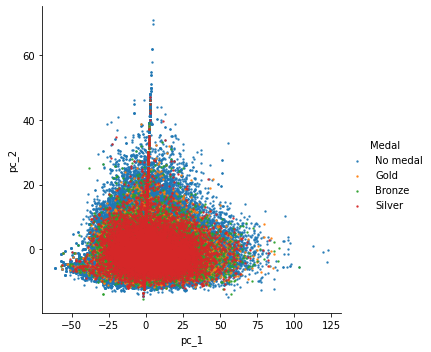

In [118]:
# Plot
import seaborn as sns
sns.lmplot( x="pc_1", y="pc_2",
  data=res_df, 
  fit_reg=False, 
  hue='Medal', # color by cluster
  legend=True,
  scatter_kws={"s": 2}); # specify the point size

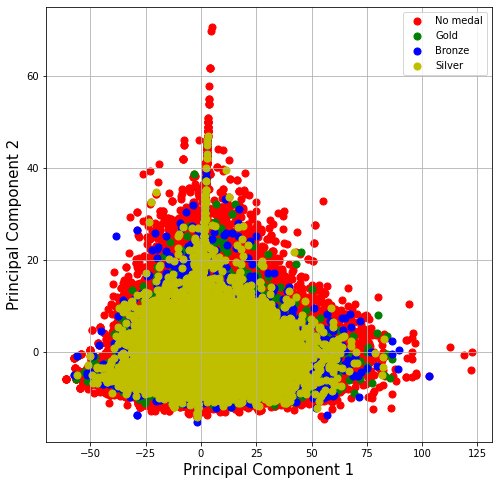

In [119]:
import matplotlib.pyplot as plt
targets=df["Medal"].unique()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = res_df['Medal'] == target
    ax.scatter(res_df.loc[indicesToKeep, 'pc_1']
               , res_df.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

There is no clearly separation between the medals.

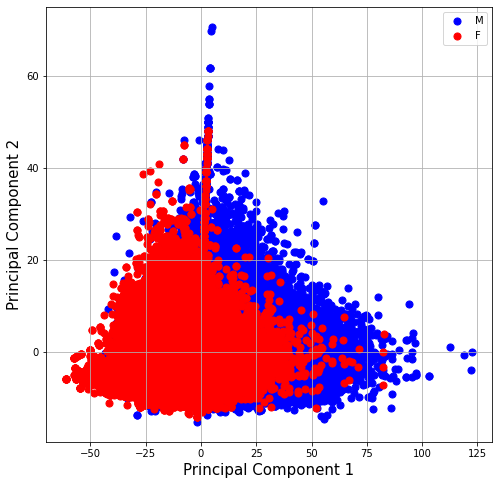

In [120]:
import matplotlib.pyplot as plt
targets=df["Sex"].unique()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = res_df['Sex'] == target
    ax.scatter(res_df.loc[indicesToKeep, 'pc_1']
               , res_df.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

There is no clearly separation between the sex.

# Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

In [99]:
df_st.head()

,Age,Height,Weight,Medal_No medal,Medal_Bronze,Medal_Gold,Medal_Silver,Sex_F,Sex_M,Season_Summer,Season_Winter
0,24.0,180.0,80.0,1,0,0,0,0,1,1,0
1,23.0,170.0,60.0,1,0,0,0,0,1,1,0
2,24.0,175.0,70.0,1,0,0,0,0,1,1,0
3,34.0,175.0,70.0,0,0,1,0,0,1,1,0
4,21.0,185.0,82.0,1,0,0,0,1,0,0,1


In [103]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_st)
transformer

RobustScaler()

In [104]:
transformer.transform(df_st)

array([[ 0.        ,  0.5       ,  0.83333333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16666667, -0.5       , -0.83333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5       ,  0.1       , -0.91666667, ...,  0.        ,
        -1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.16666667, ...,  0.        ,
        -1.        ,  1.        ],
       [ 1.66666667,  1.        ,  2.16666667, ...,  0.        ,
        -1.        ,  1.        ]])